<h1>Objective:</h1><br>
The objective of this Case is to Predication of bike rental count on daily based on the
environmental and seasonal settings.

In [436]:
################# Importing Required Libraries ###################
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import datetime
from fancyimpute import KNN
import seaborn as sns
from ggplot import *

C:\Users\abhij\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,


In [384]:
#Setting working directory
os.chdir("D:\Data Science\Edwisor\Project")

In [385]:
os.getcwd()

'D:\\Data Science\\Edwisor\\Project'

In [386]:
#Loading the data set
bike_data= pd.read_csv("day.csv")

<h3>Data Visualization</h3>

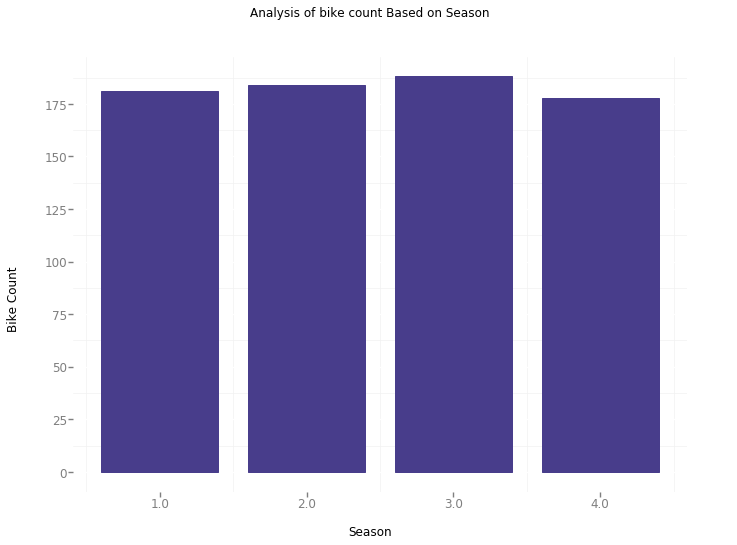

<ggplot: (105519002579)>

In [439]:
#Visualization
# Analysing the bike count based on season
ggplot(bike_data, aes(x= 'season', y= 'cnt')) +\
geom_bar(fill= "DarkSlateBlue") +\
scale_color_brewer(type= 'diverging', palette= 4) +\
xlab("Season") + ylab("Bike Count") + ggtitle("Analysis of bike count Based on Season") + theme_bw()

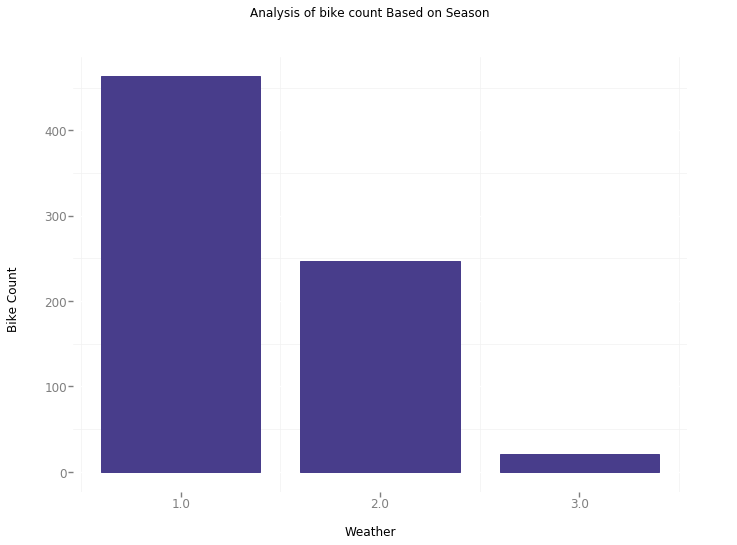

<ggplot: (105520746728)>

In [440]:
#Visualization
# Analysing the bike count based on season
ggplot(bike_data, aes(x= 'weathersit', y= 'cnt')) +\
geom_bar(fill= "DarkSlateBlue") +\
scale_color_brewer(type= 'diverging', palette= 4) +\
xlab("Weather") + ylab("Bike Count") + ggtitle("Analysis of bike count Based on Season") + theme_bw()

In [387]:
bike_data.shape

(731, 16)

In [388]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


<h1> Exploratory Data Analysis(EDA)</h1>

In [389]:
################ Exploratory Data Analysis #####################
bike_data['season']= bike_data['season'].astype('category')
bike_data['yr']= bike_data['yr'].astype('category')
bike_data['mnth']= bike_data['mnth'].astype('category')
bike_data['holiday']= bike_data['holiday'].astype('category')
bike_data['weekday']= bike_data['weekday'].astype('category')
bike_data['workingday']= bike_data['workingday'].astype('category')
bike_data['weathersit']= bike_data['weathersit'].astype('category')
df=bike_data['dteday'].copy()
for i in range (0,df.shape[0]):
    df[i]=datetime.datetime.strptime(df[i], '%Y-%m-%d').strftime('%d')
bike_data['dteday']=df
bike_data['dteday']=bike_data['dteday'].astype('category')
bike_data = bike_data.drop(['instant'], axis=1)

In [390]:
# Checking the data types of each of the predictor
bike_data.dtypes

dteday        category
season        category
yr            category
mnth          category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object

In [391]:
############### Misiing Value Analysis ######################
missing_val= pd.DataFrame(bike_data.isnull().sum())

In [392]:
missing_val

,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0
atemp,0


<h3>Outlier Analysis</h3>

{'whiskers': [<matplotlib.lines.Line2D at 0x18916a4cba8>,
 'caps': [<matplotlib.lines.Line2D at 0x18916a4cfd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x18916a4c780>],
 'medians': [<matplotlib.lines.Line2D at 0x18916a56908>],
 'fliers': [<matplotlib.lines.Line2D at 0x18916a56c50>],
 'means': []}

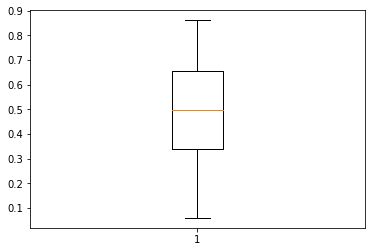

In [393]:
######################## Outlier Analysis ######################
#Selecting only numeric values
%matplotlib inline
cnames=["temp","atemp","hum","windspeed","casual", "registered", "cnt"]
#ploting boxplotto visualize outliers#
plt.boxplot(bike_data['temp'])

{'whiskers': [<matplotlib.lines.Line2D at 0x18916aa2cf8>,
 'caps': [<matplotlib.lines.Line2D at 0x18916aad3c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x18916aa2978>],
 'medians': [<matplotlib.lines.Line2D at 0x18916aada58>],
 'fliers': [<matplotlib.lines.Line2D at 0x18916aadda0>],
 'means': []}

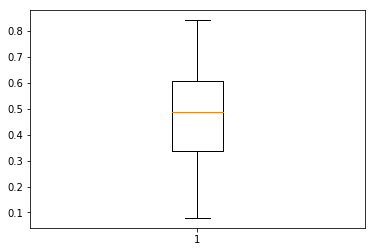

In [394]:
plt.boxplot(bike_data['atemp'])

{'whiskers': [<matplotlib.lines.Line2D at 0x18916afdf98>,
 'caps': [<matplotlib.lines.Line2D at 0x18916b08668>,
 'boxes': [<matplotlib.lines.Line2D at 0x18916afdba8>],
 'medians': [<matplotlib.lines.Line2D at 0x18916b08cf8>],
 'fliers': [<matplotlib.lines.Line2D at 0x18916b08dd8>],
 'means': []}

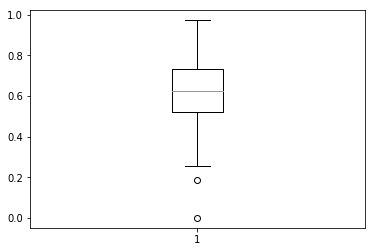

In [395]:
plt.boxplot(bike_data['hum'])

{'whiskers': [<matplotlib.lines.Line2D at 0x18916b5d6d8>,
 'caps': [<matplotlib.lines.Line2D at 0x18916b5dd68>,
 'boxes': [<matplotlib.lines.Line2D at 0x18916b5d2e8>],
 'medians': [<matplotlib.lines.Line2D at 0x18916b65438>],
 'fliers': [<matplotlib.lines.Line2D at 0x18916b65780>],
 'means': []}

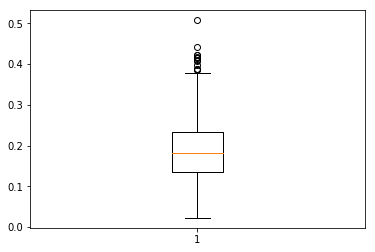

In [396]:
plt.boxplot(bike_data['windspeed'])

{'whiskers': [<matplotlib.lines.Line2D at 0x18916bafef0>,
 'caps': [<matplotlib.lines.Line2D at 0x18916bba5c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x18916bafb00>],
 'medians': [<matplotlib.lines.Line2D at 0x18916bbac50>],
 'fliers': [<matplotlib.lines.Line2D at 0x18916bbaf98>],
 'means': []}

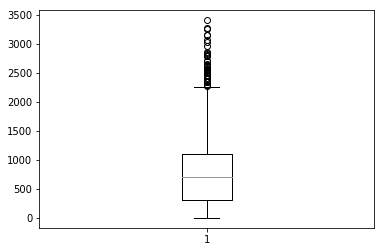

In [397]:
plt.boxplot(bike_data['casual'])

{'whiskers': [<matplotlib.lines.Line2D at 0x18916beadd8>,
 'caps': [<matplotlib.lines.Line2D at 0x18916c17748>,
 'boxes': [<matplotlib.lines.Line2D at 0x18916beac88>],
 'medians': [<matplotlib.lines.Line2D at 0x18916c17dd8>],
 'fliers': [<matplotlib.lines.Line2D at 0x18916c17eb8>],
 'means': []}

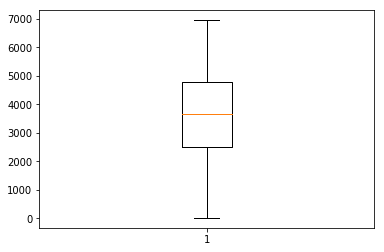

In [398]:
plt.boxplot(bike_data['registered'])

In [399]:
#Detecting and replacing the outlier value with NA. Also calcultaing 75th & 25th percentile of the data to calculate inter- 
#quartile range which in turn will help to calculate Lower fence and Upper fence

q75,q25=np.percentile(bike_data['hum'],[75,25])
iqr=q75-q25

maximum= q75 + (iqr*1.5)
minimum= q25 - (iqr*1.5)

bike_data.loc[bike_data['hum']< minimum, 'hum'] = np.nan
bike_data.loc[bike_data['hum']> maximum, 'hum'] = np.nan

In [400]:
q75w,q25w=np.percentile(bike_data['windspeed'],[75,25])
iqrw=q75w-q25w

maximum_windspeed= q75w + (iqrw*1.5)
minimum_windspeed= q25w - (iqrw*1.5)

bike_data.loc[bike_data['windspeed']< minimum_windspeed, 'windspeed'] = np.nan
bike_data.loc[bike_data['windspeed']> maximum_windspeed, 'windspeed'] = np.nan


In [401]:
q75c,q25c=np.percentile(bike_data['casual'],[75,25])
iqrc=q75c-q25c

maximum_casual= q75c + (iqrc*1.5)
minimum_casual= q25c - (iqrc*1.5)
iqrc
bike_data.loc[bike_data['casual']< minimum_casual, 'casual'] = np.nan
bike_data.loc[bike_data['casual']> maximum_casual, 'casual'] = np.nan

In [402]:
missing_val= pd.DataFrame(bike_data.isnull().sum())

In [403]:
missing_val

,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0
atemp,0


In [404]:
# Imputing the missing value with KNN method
bike_data=pd.DataFrame(KNN(k=5).fit_transform(bike_data),columns=bike_data.columns)

Imputing row 1/731 with 0 missing, elapsed time: 0.276
Imputing row 101/731 with 0 missing, elapsed time: 0.277
Imputing row 201/731 with 0 missing, elapsed time: 0.277
Imputing row 301/731 with 0 missing, elapsed time: 0.278
Imputing row 401/731 with 0 missing, elapsed time: 0.278
Imputing row 501/731 with 0 missing, elapsed time: 0.280
Imputing row 601/731 with 0 missing, elapsed time: 0.282
Imputing row 701/731 with 0 missing, elapsed time: 0.284


<h3> Correlational Analysis</h3>

In [405]:
################## Feature Selection #######################
#Correlational Analysis
#Correlational Plot
bike_data_corr= bike_data.loc[:, cnames]

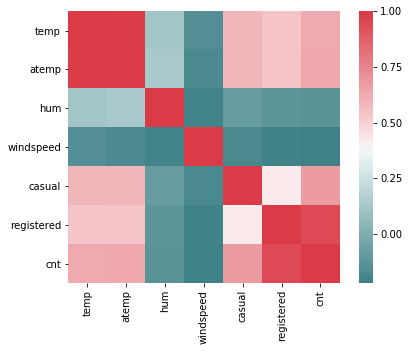

In [406]:
#Setting the height and width of the plot
f, ax= plt.subplots(figsize=(7,5))
#generating correlation matrix
corr= bike_data_corr.corr()
#Ploting using seaborn library
sns.heatmap(corr, mask= np.zeros_like(corr, dtype= np.bool), cmap= sns.diverging_palette(200, 10, as_cmap= True),
           square= True, ax=ax)

In [407]:
# Dimension Reduction (droping Higly correlated inedepend variable)
bike_data = bike_data.drop(['atemp'], axis=1)

In [408]:
bike_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1.0,1.0,0.0,1.0,0.0,6.0,0.0,2.0,0.344167,0.805833,0.160446,331.0,654.0,985.0
1,2.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.363478,0.696087,0.248539,131.0,670.0,801.0
2,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.196364,0.437273,0.248309,120.0,1229.0,1349.0
3,4.0,1.0,0.0,1.0,0.0,2.0,1.0,1.0,0.200000,0.590435,0.160296,108.0,1454.0,1562.0
4,5.0,1.0,0.0,1.0,0.0,3.0,1.0,1.0,0.226957,0.436957,0.186900,82.0,1518.0,1600.0


In [409]:
# Splitting the data into training set and test set
from sklearn.model_selection import train_test_split
train, test = train_test_split(bike_data, test_size=0.2)

<h3> Linear Regression</h3>

In [412]:
############### Linear Regression #######################
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(train.iloc[:, 0:13], train.iloc[:, 13])
predictions_LR= regressor.predict(test.iloc[:, 0:13])

<h3> Decision Tree </h3>

In [410]:
####################### Decision Tree #######################
from sklearn.tree import DecisionTreeRegressor
regressor_DT = DecisionTreeRegressor(max_depth=10).fit(train.iloc[:,0:13], train.iloc[:,13])
predictions_DT = regressor_DT.predict(test.iloc[:,0:13])

<h3> Random Forest </h3>

In [434]:
####################### Random Forest #########################
from sklearn.ensemble import RandomForestRegressor
regressor_RF = RandomForestRegressor(n_estimators = 200).fit(train.iloc[:,0:13], train.iloc[:,13])
RF_Predictions = regressor_RF.predict(test.iloc[:,0:13])

<h3> Model Evaluation </h3>

In [414]:
# MAPE Function
def MAPE(y, yhat): 
    mape = np.mean(np.abs((y - yhat) / y))*100
    print("MAPE:", mape)
    
#RMSE Function
def RMSE(y_test,yhat):
    mse = np.mean((y_test-yhat)**2)
    print("Mean Square : ",mse)
    rmse=np.sqrt(mse)
    print("Root Mean Square : ",rmse)
    



In [415]:
#Mape for Linear Regression
MAPE(test.iloc[:,13],predictions_LR)
RMSE(test.iloc[:,13],predictions_LR)

MAPE: 1.8615869314321472
Mean Square :  18503.736740826887
Root Mean Square :  136.02844092625222


In [416]:
#Mape for Decision Tree
MAPE(test.iloc[:,13],predictions_DT)
RMSE(test.iloc[:,13],predictions_DT)

MAPE: 4.0471362073593795
Mean Square :  63131.00691280461
Root Mean Square :  251.2588444469261


In [435]:
#Mape for Random Forest
MAPE(test.iloc[:,13],RF_Predictions)
RMSE(test.iloc[:,13],RF_Predictions)

MAPE: 2.1659028272006298
Mean Square :  20716.912411413417
Root Mean Square :  143.933708391792


<h3> Applying K fold Cross Validation </h3>

In [413]:
# After Calculating MAPE & RMSE for all the models we can see that Linear model fits the data best. So applying K Fold Cross Validation
# to check the performance of the model on different test set.
#Applying K Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies= cross_val_score(estimator= regressor, X= train.iloc[:,0:13], y= train.iloc[:,13], cv= 10)
accuracies.mean()

0.9919671007382972

<h3> Prediction of bike count</h3>

In [382]:
## Extracting Predicted values from the Multiple Linear Regression Model
result=pd.DataFrame(test.iloc[:,0:13])
result['predicted_cnt'] = (predictions_LR)

result.to_csv("Bike_Count python.csv",index=False)
